Step 9: 2D Diffusion
----
***
And here is the 2D-diffusion equation:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

You will recall that we came up with a method for discretizing second order derivatives in Step 4, when investigating 1-D diffusion.  We are going to use the same scheme here, with our forward difference in time and two second-order derivatives. 
$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$

Once again, we reorganize the discretized equation and solve for $u_{i,j}^{n+1}$
$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^n &+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) \\
&+ \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt, cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# variable declarations

nx = 31
ny = 31
nt = 17
nu = 0.05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.25
dt = sigma * dx * dy / nu

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((nx,ny))
un = np.ones((nx,ny)) #placeholder of solution

# initial condition
u[int(0.5/dx):int(1/dx+1),int(0.5/dy):int(1/dy+1)] = 2

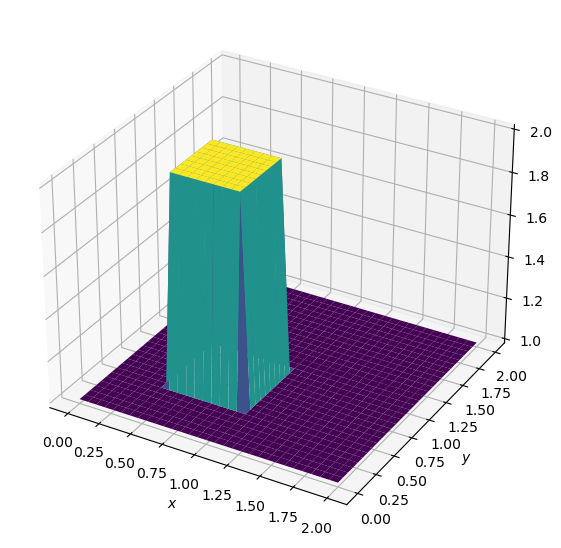

In [3]:
fig = plt.figure(figsize = (11,7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
# The '111' means a grid of 1 row and 1 column and this subplot is the first one.
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,u,cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [4]:
# Run through nt timestep

def diffuse(nt):
    u[:,:] = 1
    u[int(0.5/dx):int(1/dx+1),int(0.5/dy):int(1/dy+1)] = 2
    
    for n in range(nt):
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1, 1:-1] + 
                        nu * dt / dx**2 *
                        (un[2:,1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2,1:-1]) +
                        nu * dt / dy**2 *
                        (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1,0:-2]))
        u[0,:] = 1
        u[-1,:] = 1
        u[:,0] = 1
        u[:,-1] = 1
    fig = plt.figure(figsize = (11,7), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    # The '111' means a grid of 1 row and 1 column and this subplot is the first one.
    X, Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,u,cmap=cm.viridis)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

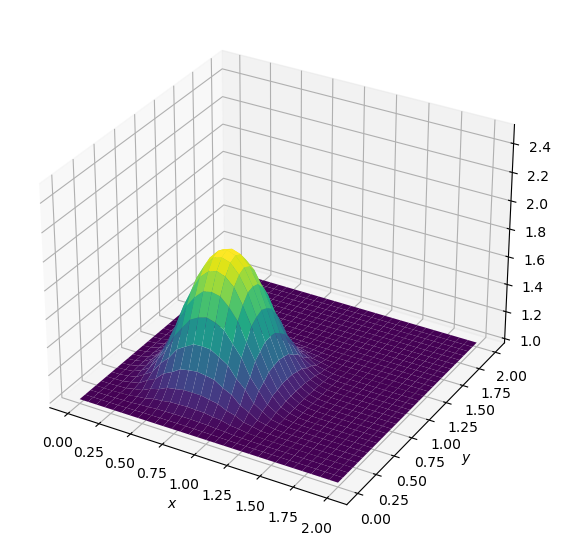

In [5]:
diffuse(10)

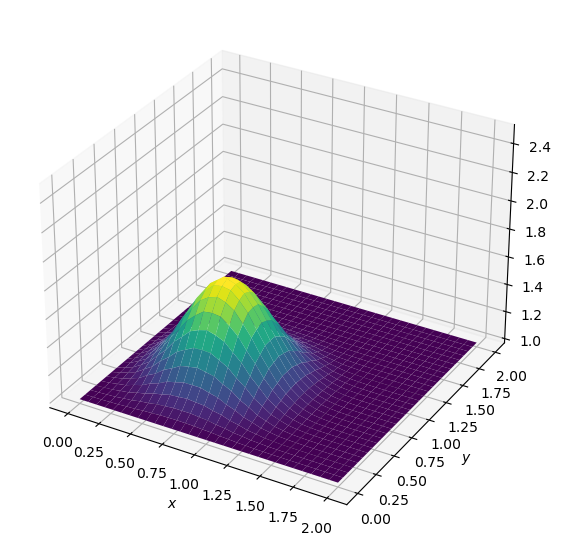

In [6]:
diffuse(20)

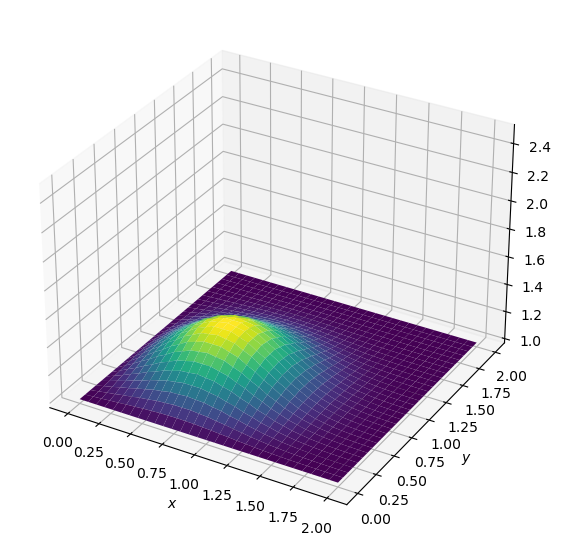

In [10]:
diffuse(50)

### Explicit solver for 2D Diffusion

And here is the 2D-diffusion equation:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

You will recall that we came up with a method for discretizing second order derivatives in Step 3, when investigating 1-D diffusion.  We are going to use the same scheme here, with our forward difference in time and two second-order derivatives. 
$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$


### Implicit solver for 2D Diffusion

The 2D-diffusion equation:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

Here we use backward difference in time and two second-order derivatives. 
$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^{n+1} - 2 u_{i,j}^{n+1} + u_{i-1,j}^{n+1}}{\Delta x^2} + \nu \frac{u_{i,j+1}^{n+1}-2 u_{i,j}^{n+1} + u_{i,j-1}^{n+1}}{\Delta y^2}$$

We reorganize the discretized equation and solve for

$$ \frac{-\nu}{\Delta y^2}u_{i,j-1}^{n+1} + \frac{-\nu}{\Delta x^2}u_{i-1,j}^{n+1} + (\frac{1}{\Delta t} + \frac{2\nu}{\Delta x^2} + \frac{2\nu}{\Delta y^2})u_{i,j}^{n+1} + \frac{-\nu}{\Delta x^2}u_{i+1,j}^{n+1} + \frac{-\nu}{\Delta y^2}u_{i,j+1}^{n+1} = \frac{1}{\Delta t}u_{i,j}^{n}  $$

Explicit solvers compute the state of a system at a future time step using only the information available at the current time step. They are generally simple to implement but can require smaller time steps for stability. In contrast, implicit solvers determine the future state of the system by solving equations that include terms from both the current and the future time steps. While often more complex in implementation and requiring the solution of systems of equations, implicit solvers can be more stable, especially for stiff equations, and allow for larger time steps.
We will introduce how to implment a general implicit solver in Special Topic 1 (Step 17)!